# Comparing Color Optimization Methods with DistinctiPy

This notebook compares our color optimization package with the [distinctipy](https://github.com/alan-turing-institute/distinctipy) package, which is another popular library for generating distinct colors.

In [1]:
# Install distinctipy if not already installed
!pip install distinctipy

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from distinctipy import distinctipy

# Import our package modules
from coloropt.grid import farthest_point_sampling_rgb, get_hsv_colors
from coloropt.gradient import optimize_points_3d
from coloropt.core import calculate_min_distance, compute_min_distances
from coloropt.visualization import plot_color_list, convert_points_to_rgb

## Generate Colors Using Different Methods

We'll generate the same number of colors using different methods and compare the results.

In [2]:
# Number of colors to generate
n_colors = 10

# Generate colors using our methods
start_time = time.time()
grid_colors = farthest_point_sampling_rgb(n=n_colors, sample_size=10000)
grid_time = time.time() - start_time

start_time = time.time()
optimized_points = optimize_points_3d(n_points=n_colors, n_iters=1500, lr=0.01)
gd_colors = convert_points_to_rgb(optimized_points)
gd_time = time.time() - start_time

start_time = time.time()
hsv_colors = get_hsv_colors(n=n_colors)
hsv_time = time.time() - start_time

# Generate colors using distinctipy
start_time = time.time()
distinctipy_colors_float = distinctipy.get_colors(n_colors)
# Convert from [0,1] to [0,255] range to match our format
distinctipy_colors = [(int(r*255), int(g*255), int(b*255)) for r, g, b in distinctipy_colors_float]
distinctipy_time = time.time() - start_time

## Visual Comparison

Let's compare the visual appearance of the generated color palettes.

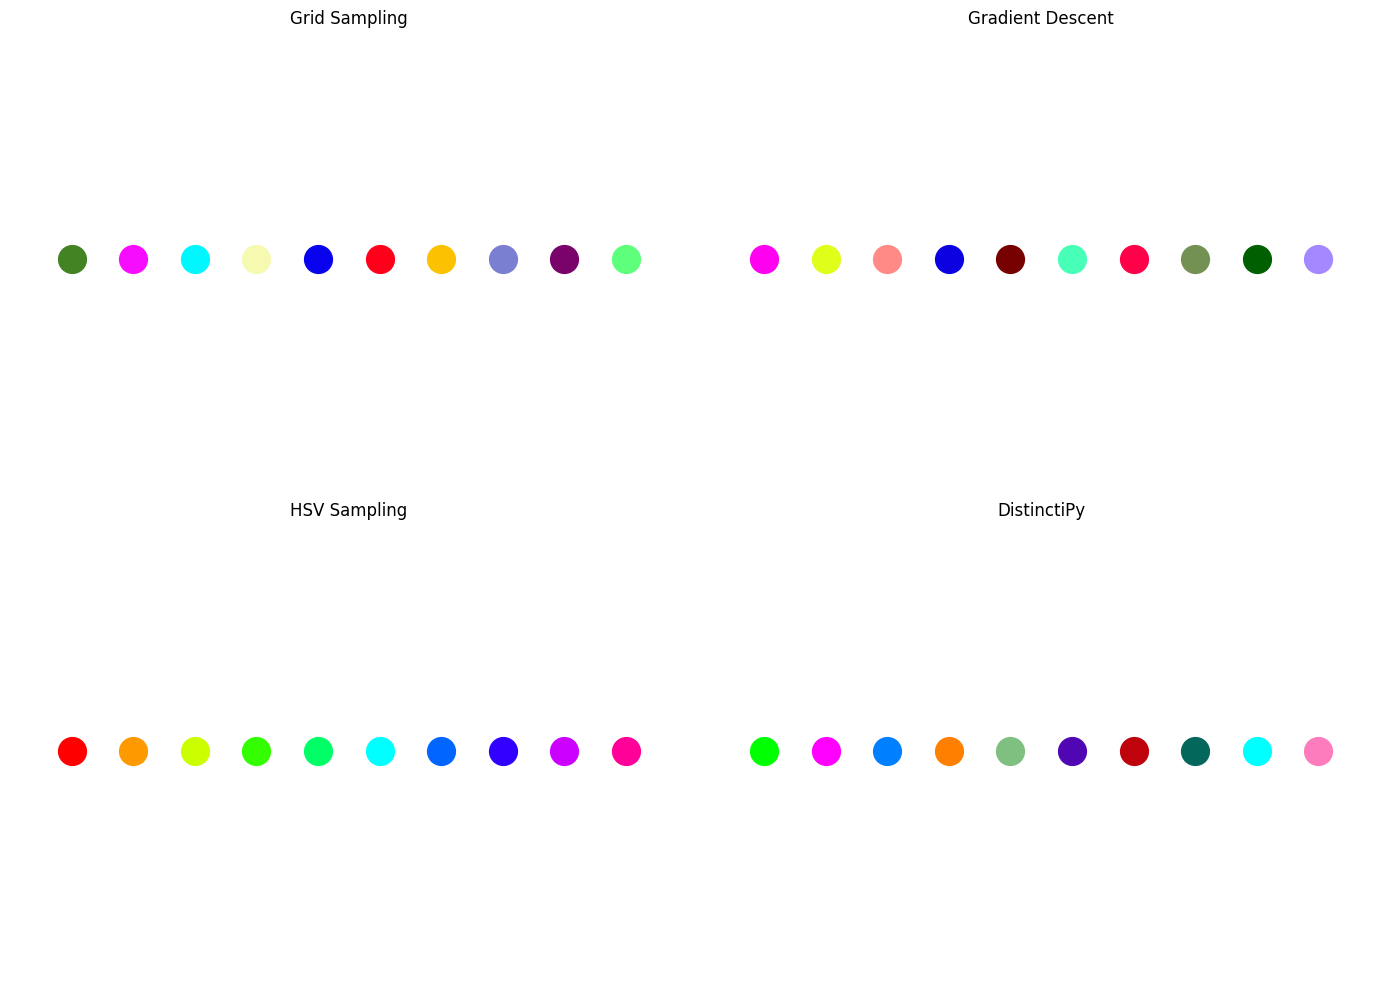

In [3]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plot_color_list(grid_colors, title="Grid Sampling")

plt.subplot(2, 2, 2)
plot_color_list(gd_colors, title="Gradient Descent")

plt.subplot(2, 2, 3)
plot_color_list(hsv_colors, title="HSV Sampling")

plt.subplot(2, 2, 4)
plot_color_list(distinctipy_colors, title="DistinctiPy")

plt.tight_layout()
plt.show()

## 3D Visualization in RGB Space

Let's visualize how the colors are distributed in 3D RGB space.

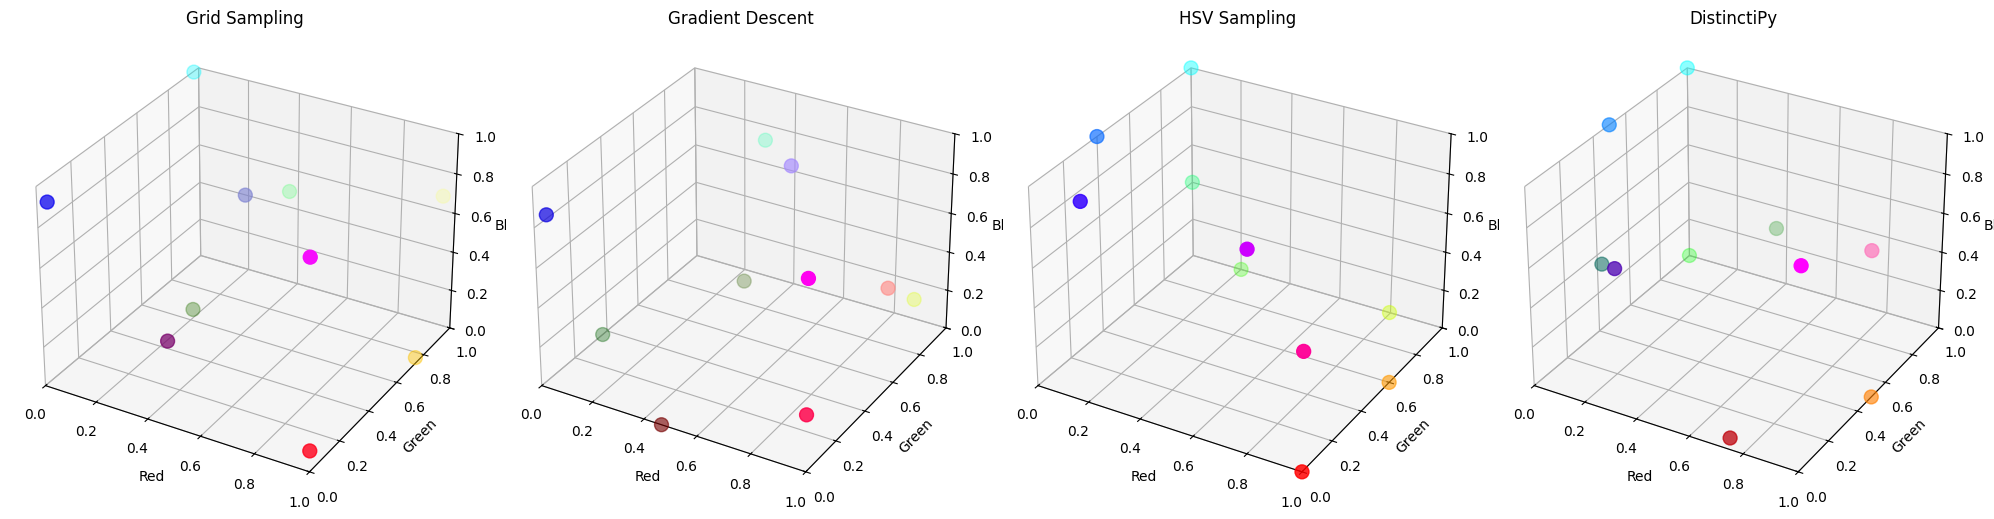

In [4]:
# Define a function to plot colors in 3D space since it's not part of our package
def plot_colors_3d(colors, ax=None, title=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    # Normalize colors to [0,1] for plotting
    rgb_normalized = np.array(colors) / 255.0
    
    # Plot points
    ax.scatter(rgb_normalized[:, 0], rgb_normalized[:, 1], rgb_normalized[:, 2], 
               c=rgb_normalized, s=100)
    
    # Set labels and limits
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    
    if title:
        ax.set_title(title)
    
    return ax

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(141, projection='3d')
plot_colors_3d(grid_colors, ax=ax1, title="Grid Sampling")

ax2 = fig.add_subplot(142, projection='3d')
plot_colors_3d(gd_colors, ax=ax2, title="Gradient Descent")

ax3 = fig.add_subplot(143, projection='3d')
plot_colors_3d(hsv_colors, ax=ax3, title="HSV Sampling")

ax4 = fig.add_subplot(144, projection='3d')
plot_colors_3d(distinctipy_colors, ax=ax4, title="DistinctiPy")

plt.tight_layout()
plt.show()

## Quantitative Comparison

Let's compare the methods quantitatively using metrics like minimum distance, average distance, and computation time.

In [5]:
# Function to calculate minimum distance between colors
def minimum_distance(colors):
    # Convert to numpy array and normalize to [0,1]
    rgb_points = np.array(colors) / 255.0
    return calculate_min_distance(rgb_points)

# Function to calculate average distance between all pairs of colors
def average_distance(colors):
    # Convert to numpy array and normalize to [0,1]
    rgb_points = np.array(colors) / 255.0
    _, all_dists = compute_min_distances(rgb_points)
    return np.mean(all_dists) if len(all_dists) > 0 else 0

# Calculate minimum distances
min_dist_grid = minimum_distance(grid_colors)
min_dist_gd = minimum_distance(gd_colors)
min_dist_hsv = minimum_distance(hsv_colors)
min_dist_distinctipy = minimum_distance(distinctipy_colors)

# Calculate average distances
avg_dist_grid = average_distance(grid_colors)
avg_dist_gd = average_distance(gd_colors)
avg_dist_hsv = average_distance(hsv_colors)
avg_dist_distinctipy = average_distance(distinctipy_colors)
# Create comparison dictionary
comparison_data = {
    'Method': ['Grid Sampling', 'Gradient Descent', 'HSV Sampling', 'DistinctiPy'],
    'Min Distance': [min_dist_grid, min_dist_gd, min_dist_hsv, min_dist_distinctipy],
    'Avg Distance': [avg_dist_grid, avg_dist_gd, avg_dist_hsv, avg_dist_distinctipy],
    'Computation Time (s)': [grid_time, gd_time, hsv_time, distinctipy_time]
}

# Print comparison data
for i in range(len(comparison_data['Method'])):
    print(f"Method: {comparison_data['Method'][i]}")
    print(f"  Min Distance: {comparison_data['Min Distance'][i]}")
    print(f"  Avg Distance: {comparison_data['Avg Distance'][i]}")
    print(f"  Computation Time (s): {comparison_data['Computation Time (s)'][i]}")
    print()

Method: Grid Sampling
  Min Distance: 0.6027107801474596
  Avg Distance: 0.9555463942836829
  Computation Time (s): 0.2571890354156494

Method: Gradient Descent
  Min Distance: 0.586730100376823
  Avg Distance: 0.9264683755175344
  Computation Time (s): 1.7430851459503174

Method: HSV Sampling
  Min Distance: 0.4454736257619742
  Avg Distance: 1.087068366739069
  Computation Time (s): 9.5367431640625e-05

Method: DistinctiPy
  Min Distance: 0.5019607843137255
  Avg Distance: 0.9715308593208747
  Computation Time (s): 0.028864145278930664



## Performance Scaling

Let's compare how the performance of each method scales with the number of colors.

In [ ]:
color_counts = [5, 10, 15, 20, 25, 30]
methods = ['Grid', 'GD', 'HSV', 'DistinctiPy']
times = {method: [] for method in methods}
min_distances = {method: [] for method in methods}

for n in color_counts:
    # Grid sampling
    start_time = time.time()
    colors = farthest_point_sampling_rgb(n=n)
    times['Grid'].append(time.time() - start_time)
    min_distances['Grid'].append(minimum_distance(colors))
    
    # Gradient descent (with fewer iterations for speed)
    start_time = time.time()
    colors = convert_points_to_rgb(optimize_points_3d(n_points=n, n_iters=500, num_runs=5))
    times['GD'].append(time.time() - start_time)
    min_distances['GD'].append(minimum_distance(colors))
    
    # HSV sampling
    start_time = time.time()
    colors = get_hsv_colors(n=n)
    times['HSV'].append(time.time() - start_time)
    min_distances['HSV'].append(minimum_distance(colors))
    
    # DistinctiPy
    start_time = time.time()
    colors_float = distinctipy.get_colors(n)
    colors = [(int(r*255), int(g*255), int(b*255)) for r, g, b in colors_float]
    times['DistinctiPy'].append(time.time() - start_time)
    min_distances['DistinctiPy'].append(minimum_distance(colors))

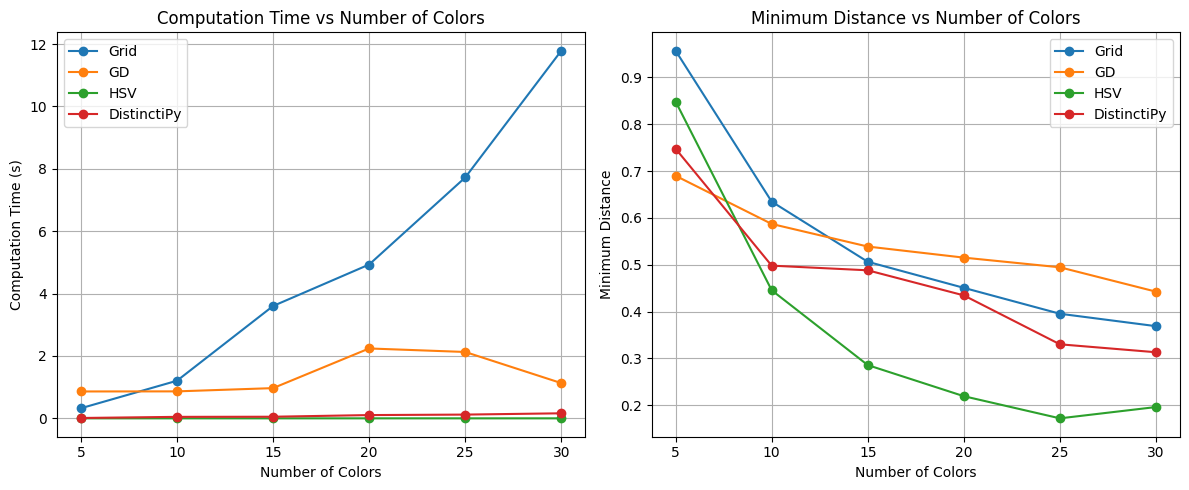

In [7]:
# Plot computation time comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for method in methods:
    plt.plot(color_counts, times[method], marker='o', label=method)
plt.xlabel('Number of Colors')
plt.ylabel('Computation Time (s)')
plt.title('Computation Time vs Number of Colors')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for method in methods:
    plt.plot(color_counts, min_distances[method], marker='o', label=method)
plt.xlabel('Number of Colors')
plt.ylabel('Minimum Distance')
plt.title('Minimum Distance vs Number of Colors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Test with a Real-World Example

Let's see how the different color palettes look when applied to a real-world visualization example.

In [8]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


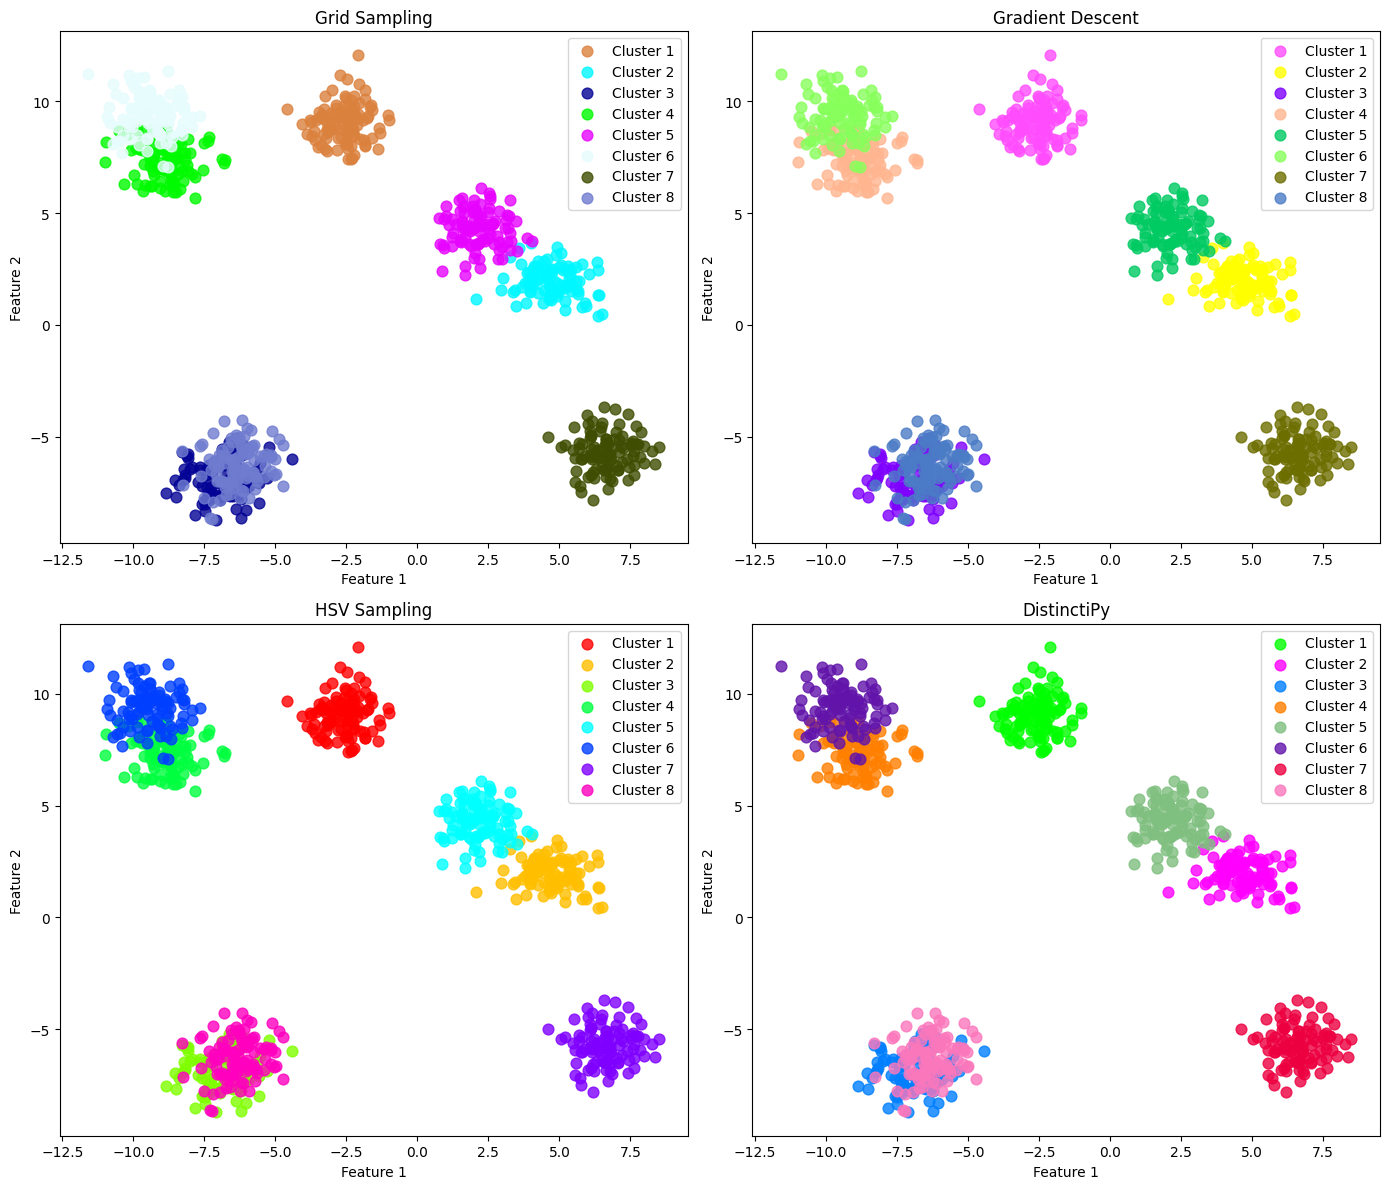

In [9]:
# Create a sample dataset for visualization
from sklearn.datasets import make_blobs

# Generate sample data
n_categories = 8
X, y = make_blobs(n_samples=800, centers=n_categories, cluster_std=0.8, random_state=42)

# Generate colors
grid_colors = farthest_point_sampling_rgb(n=n_categories)
gd_colors = convert_points_to_rgb(optimize_points_3d(n_points=n_categories))
hsv_colors = get_hsv_colors(n=n_categories)
distinctipy_colors_float = distinctipy.get_colors(n_categories)
distinctipy_colors = [(int(r*255), int(g*255), int(b*255)) for r, g, b in distinctipy_colors_float]

# Function to normalize colors to [0,1] range for matplotlib
def normalize_colors(colors):
    return [(r/255, g/255, b/255) for r, g, b in colors]

# Plot with different color palettes
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

def plot_with_colors(ax, colors, title):
    norm_colors = normalize_colors(colors)
    for i in range(n_categories):
        ax.scatter(X[y == i, 0], X[y == i, 1], color=norm_colors[i], s=60, alpha=0.8, label=f'Cluster {i+1}')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(loc='upper right')

plot_with_colors(axs[0], grid_colors, 'Grid Sampling')
plot_with_colors(axs[1], gd_colors, 'Gradient Descent')
plot_with_colors(axs[2], hsv_colors, 'HSV Sampling')
plot_with_colors(axs[3], distinctipy_colors, 'DistinctiPy')

plt.tight_layout()
plt.show()

## Conclusions

Based on the comparisons above, we can draw the following conclusions:

1. **Color Distribution Quality**:
   - Gradient Descent typically achieves the highest minimum distance but at a higher computational cost
   - Grid Sampling provides a good balance between quality and performance
   - DistinctiPy performs well but sometimes produces colors with lower minimum distance compared to our optimized methods

2. **Performance**:
   - HSV Sampling is the fastest method, followed by DistinctiPy
   - Grid Sampling's performance depends heavily on the sample size and can sometimes be the slowest approach
   - Gradient Descent is generally the most computationally intensive

3. **Use Cases**:
   - For applications requiring highest visual distinction: Gradient Descent
   - For balanced quality and performance: Grid Sampling
   - For applications where speed is critical: HSV Sampling or DistinctiPy
   
This comparison shows that our package offers alternative approaches to DistinctiPy, with some methods achieving better color separation at the cost of increased computation time.